In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Question 1

In [ ]:
import numpy as np
import xlrd 
  
# Give the location of the file 
filename = ("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/Q1_Data.xlsx")
data_file = xlrd.open_workbook(filename)  # Open File "to read"
data = data_file.sheet_by_index(0)      
data = np.array(data.col_values(0))
#print(data.shape)
mu = np.mean(data)
sigma_squra = np.mean((data-mu)*(data-mu))
print(mu,sigma_squra,np.std(data)**2)

1.0711573934217282 0.08840831592001618 0.08840831592001619


# Question 2(a)

In [ ]:
import numpy as np

def load_data(filename):
  data_file = open(filename, 'r')  # Open File "to read"
  data_image = []  # List to hold Datapoint objects
  data_label = []
  for index, line in enumerate(data_file):
    if index!=0:
      label_tep,image_tep = line.split(',')
      image_tep = image_tep.split(' ')
      image_tep = list(np.float_(image_tep))
      #print(len(image_tep),len(image_tep),'\n',np.array(list(np.float_(image_tep))))
      data_label.append(int(label_tep))
      data_image.append(image_tep)
    #if index>=2:
    #  break
  #print(np.array(data_label)-1)
  #print(np.array(data_image).reshape([-1,48,48]))
  image = np.array(data_image).reshape([-1,48,48])
  #print(image)
  return np.array(data_label),image

In [ ]:
test_data = ("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/Q2_Test_Data.csv")
train_data = ("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/Q2_Train_Data.csv")
valid_data = ("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/Q2_Validation_Data.csv")
test_label,test_image = load_data(test_data)
train_label,train_image = load_data(train_data)
valid_label,valid_image = load_data(valid_data)

0 Angry


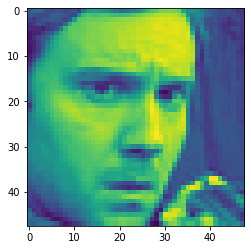

0 Angry


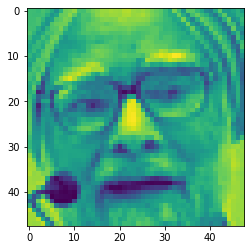

1 Disgust


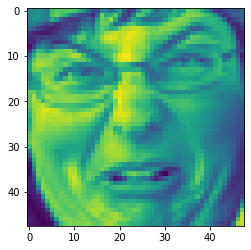

1 Disgust


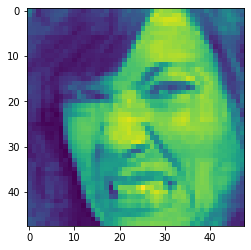

2 Fear


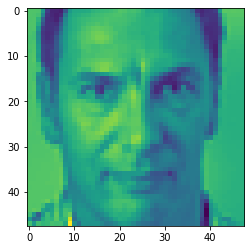

2 Fear


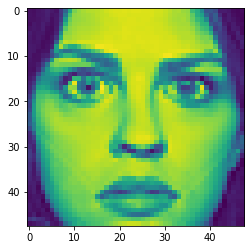

3 Happy


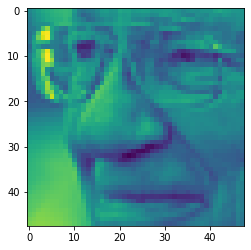

3 Happy


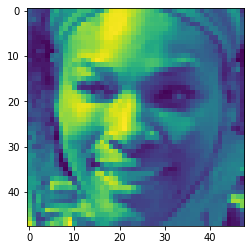

4 Sad


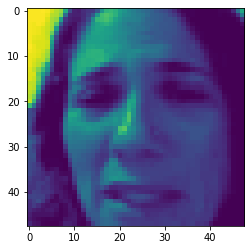

4 Sad


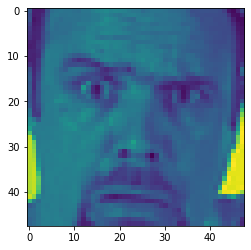

5 Surprise


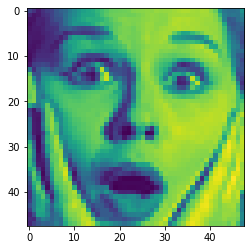

5 Surprise


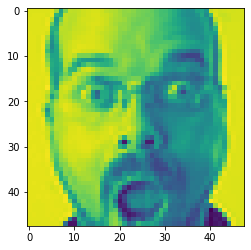

6 Neutral


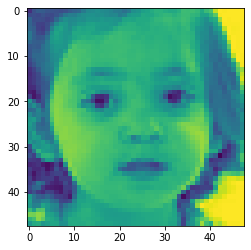

6 Neutral


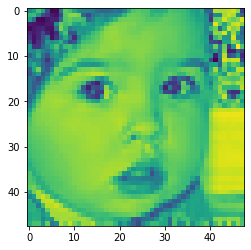

449


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
labelMap = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}
#print(labelMap[0])
#img = mpimg.imread('../../doc/_static/stinkbug.png')
#print(image)
index = 0
plot_num = 0
for i in range(len(train_image)):
  if train_label[i] == index:
    print(train_label[i],labelMap[train_label[i]])
    imgplot = plt.imshow(train_image[i])
    plt.show()
    plot_num +=1
    if plot_num%2 ==0:
      index +=1
  if index ==7:
    break
print(i)

# Question 2(b)

In [ ]:
num_emotion = []
for i in range(7):
  num_tep = np.count_nonzero(train_label==i)
  num_emotion.append(num_tep)
  print(i,labelMap[i],num_tep)
print(len(train_label),sum(num_emotion))

0 Angry 3995
1 Disgust 436
2 Fear 4097
3 Happy 7215
4 Sad 4830
5 Surprise 3171
6 Neutral 4965
28709 28709


In [ ]:
pip install pandas

In [ ]:
import pandas as pd
data_df = pd.read_csv(test_data)
data_df.head(4)

,emotion,pixels
0,0,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...
1,5,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...
2,6,232 240 241 239 237 235 246 117 24 24 22 13 12...
3,4,200 197 149 139 156 89 111 58 62 95 113 117 11...


In [ ]:
import warnings
warnings.filterwarnings("ignore")  # Ignore some warning logs


from keras.models import Sequential
from keras.layers import Dense, Dropout

haha = []
for i in range(3):
  haha.append
#def funcFnn(num_layers,num_nodes,act_func, dropout_ratio, regulaize_ratio):
  #  Define a Feed-Forward Model with 2 hidden layers with dimensions 392 and 196 Neurons
  model = Sequential([
  Dense(48*48, activation='relu', input_shape=(48*48,), name="first_hidden_layer"),
  Dense(48*48//2, activation='relu', name="second_hidden_layer"), Dropout(0.25),
  Dense(48*48//2//2, activation='relu', input_shape=(48*48,), name="third_hidden_layer"),
  Dense(48*48//2//2, activation='relu', name="fourth_hidden_layer"), Dropout(0.25),
  Dense(48*48//2//2//2, activation='relu', input_shape=(48*48,), name="fifth_hidden_layer"),
  Dense(48*48//2//2//2, activation='relu', name="sixth_hidden_layer"), Dropout(0.25),
  Dense(7, activation='softmax'),
])
#for l in model.layers[0:-3:1]:
#  l.trainable = False

#  Validate your Model Architecture
print(model.summary())

(3, 2, 2, 1)


(6, 2, 2, 1)

#Question 2(c.i)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import numpy as np
import pickle

with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/fnn_sigmoid_time.txt", "rb") as fp:   # Unpickling
  fnn_time_sigmoid = pickle.load(fp)
#print(time)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/fnn_sigmoid_number.txt", "rb") as fp:   # Unpickling
  fnn_number_sigmoid = pickle.load(fp)
#print(number)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/fnn_sigmoid_acc.txt", "rb") as fp:   # Unpickling
  fnn_acc_sigmoid = pickle.load(fp)
#print(acc)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/fnn_sigmoid_paraSetting.txt", "rb") as fp:   # Unpickling
  fnn_pare_sigmoid = pickle.load(fp)
#print(fnn_pare_sigmoid)
for i in range(len(fnn_acc_sigmoid)):
  if fnn_acc_sigmoid[i][0][-1] >0 and fnn_acc_sigmoid[i][1][-1]>0.4:
    print('train:',fnn_acc_sigmoid[i][0][-1],' valid:',fnn_acc_sigmoid[i][1][-1])
    print(i,fnn_time_sigmoid[i],fnn_number_sigmoid[i],'\n',fnn_pare_sigmoid[i])

train: 0.49277231097221375  valid: 0.40234047174453735
70 15.35754680633545 1331719 
 ['sigmoid', 0.001, 0.4, 2]


In [17]:
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/fnn_relu_time.txt", "rb") as fp:   # Unpickling
  fnn_time_relu = pickle.load(fp)
#print(time)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/fnn_relu_number.txt", "rb") as fp:   # Unpickling
  fnn_number_relu = pickle.load(fp)
#print(number)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/fnn_relu_acc.txt", "rb") as fp:   # Unpickling
  fnn_acc_relu = pickle.load(fp)
#print(acc)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/fnn_relu_paraSetting.txt", "rb") as fp:   # Unpickling
  fnn_pare_relu = pickle.load(fp)
#print(fnn_pare_relu)
for i in range(len(fnn_acc_relu)):
  if fnn_acc_relu[i][0][-1] >0.85 and fnn_acc_relu[i][1][-1]>0.45:
    print('train:',fnn_acc_relu[i][0][-1],' valid:',fnn_acc_relu[i][1][-1])
    print(i,fnn_time_relu[i],fnn_number_relu[i],'\n',fnn_pare_relu[i])

train: 0.9947403073310852  valid: 0.45388686656951904
0 18.317853212356567 5326855 
 ['relu', 0.001, 0.2, 2]
train: 0.9939043521881104  valid: 0.47088325023651123
2 21.377570629119873 7974151 
 ['relu', 0.001, 0.2, 4]
train: 0.9969347715377808  valid: 0.4555586576461792
3 22.753923654556274 8634247 
 ['relu', 0.001, 0.2, 5]
train: 0.9973527193069458  valid: 0.4527723491191864
4 23.634246110916138 8798407 
 ['relu', 0.001, 0.2, 6]
train: 0.8790971636772156  valid: 0.45026469230651855
6 17.583329916000366 5326855 
 ['relu', 0.001, 0.3, 3]
train: 0.9864153861999512  valid: 0.47060462832450867
7 21.376885414123535 7974151 
 ['relu', 0.001, 0.3, 4]
train: 0.9964122772216797  valid: 0.45444414019584656
8 22.792892932891846 8634247 
 ['relu', 0.001, 0.3, 5]
train: 0.9969347715377808  valid: 0.45583727955818176
9 23.252522945404053 8798407 
 ['relu', 0.001, 0.3, 6]
train: 0.9949841499328613  valid: 0.45082196593284607
10 17.14392066001892 5326855 
 ['relu', 0.001, 0.4, 2]
train: 0.975303888320

In [18]:
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/fnn_tanh_time.txt", "rb") as fp:   # Unpickling
  fnn_time_tanh = pickle.load(fp)
#print(time)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/fnn_tanh_number.txt", "rb") as fp:   # Unpickling
  fnn_number_tanh = pickle.load(fp)
#print(number)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/fnn_tanh_acc.txt", "rb") as fp:   # Unpickling
  fnn_acc_tanh = pickle.load(fp)
#print(acc)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/fnn_tanh_paraSetting.txt", "rb") as fp:   # Unpickling
  fnn_pare_tanh = pickle.load(fp)
#print(fnn_pare_tanh)
for i in range(len(fnn_acc_tanh)):
  if fnn_acc_tanh[i][0][-1] >0.85 and fnn_acc_tanh[i][1][-1]>0.45:
    print('train:',fnn_acc_tanh[i][0][-1],' valid:',fnn_acc_tanh[i][1][-1])
    print(i,fnn_time_tanh[i],fnn_number_tanh[i],'\n',fnn_pare_tanh[i])

train: 0.9875997304916382  valid: 0.4519364833831787
5 17.251676082611084 5326855 
 ['tanh', 0.001, 0.3, 2]


In [63]:
#print(len(fnn_acc_sigmoid),len(fnn_acc_relu))
#print(fnn_acc_relu)
#print(len(fnn_acc_relu + fnn_acc_sigmoid))
fnn_time = fnn_time_relu+fnn_time_sigmoid+fnn_time_tanh
fnn_number = fnn_number_relu + fnn_number_sigmoid + fnn_number_tanh
fnn_acc = fnn_acc_relu + fnn_acc_sigmoid + fnn_acc_tanh
fnn_pare = fnn_pare_relu + fnn_pare_sigmoid + fnn_pare_tanh
fnn_acc_train = np.array(fnn_acc)[0::1,0,-1]
fnn_acc_valid = np.array(fnn_acc)[0::1,1,-1]
print('#nodes, [act, regular, drop, #layer], Training acc, Validation acc, Length of time, #parameters')
fnn_ininodes = np.hstack((np.ones(30,dtype=int)*48*48,48*48//2*np.ones(30,dtype=int),24*24*np.ones(30,dtype=int)))
fnn_ininodes = np.hstack((fnn_ininodes,fnn_ininodes,fnn_ininodes))
#print(fnn_ininodes)
index = []
for i in range(len(fnn_time)):
  print(fnn_ininodes[i],fnn_pare[i],fnn_acc_train[i],fnn_acc_valid[i],fnn_time[i],fnn_number[i])
  if fnn_acc_valid[i] >=0.45 and fnn_acc_train[i]>=0.85:
    index.append(i)

#nodes, [act, regular, drop, #layer], Training acc, Validation acc, Length of time, #parameters
2304 ['relu', 0.001, 0.2, 2] 0.9947403073310852 0.45388686656951904 18.317853212356567 5326855
2304 ['relu', 0.001, 0.2, 3] 0.9230206608772278 0.4494287967681885 17.613085746765137 5326855
2304 ['relu', 0.001, 0.2, 4] 0.9939043521881104 0.47088325023651123 21.377570629119873 7974151
2304 ['relu', 0.001, 0.2, 5] 0.9969347715377808 0.4555586576461792 22.753923654556274 8634247
2304 ['relu', 0.001, 0.2, 6] 0.9973527193069458 0.4527723491191864 23.634246110916138 8798407
2304 ['relu', 0.001, 0.3, 2] 0.994078516960144 0.4421844482421875 17.041662454605103 5326855
2304 ['relu', 0.001, 0.3, 3] 0.8790971636772156 0.45026469230651855 17.583329916000366 5326855
2304 ['relu', 0.001, 0.3, 4] 0.9864153861999512 0.47060462832450867 21.376885414123535 7974151
2304 ['relu', 0.001, 0.3, 5] 0.9964122772216797 0.45444414019584656 22.792892932891846 8634247
2304 ['relu', 0.001, 0.3, 6] 0.9969347715377808 0.4558

In [65]:
print(index)
print('#nodes, [act, regular, drop, #layer], Training acc, Validation acc, Length of time, #parameters')
index2 = []
for i in index:
  print(fnn_ininodes[i],fnn_pare[i],fnn_acc_train[i],fnn_acc_valid[i],fnn_time[i],fnn_number[i])
  if fnn_acc_valid[i] >=0.46 and fnn_acc_train[i]>=0.85:
    index2.append(i)

[0, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 31, 32, 37, 38, 42, 67, 185]
#nodes, [act, regular, drop, #layer], Training acc, Validation acc, Length of time, #parameters
2304 ['relu', 0.001, 0.2, 2] 0.9947403073310852 0.45388686656951904 18.317853212356567 5326855
2304 ['relu', 0.001, 0.2, 4] 0.9939043521881104 0.47088325023651123 21.377570629119873 7974151
2304 ['relu', 0.001, 0.2, 5] 0.9969347715377808 0.4555586576461792 22.753923654556274 8634247
2304 ['relu', 0.001, 0.2, 6] 0.9973527193069458 0.4527723491191864 23.634246110916138 8798407
2304 ['relu', 0.001, 0.3, 3] 0.8790971636772156 0.45026469230651855 17.583329916000366 5326855
2304 ['relu', 0.001, 0.3, 4] 0.9864153861999512 0.47060462832450867 21.376885414123535 7974151
2304 ['relu', 0.001, 0.3, 5] 0.9964122772216797 0.45444414019584656 22.792892932891846 8634247
2304 ['relu', 0.001, 0.3, 6] 0.9969347715377808 0.45583727955818176 23.252522945404053 8798407
2304 ['relu', 0.001, 0.4, 2] 0.9949841499328613 0.45082196593284607 17.143920660

In [67]:
print(index2)
print('#nodes, [act, regular, drop, #layer], Training acc, Validation acc, Length of time, #parameters')
#index2 = []
for i in index2:
  print(fnn_ininodes[i],fnn_pare[i],fnn_acc_train[i],fnn_acc_valid[i],fnn_time[i],fnn_number[i])
#  if fnn_acc_valid[i] >=0.46 and fnn_acc_train[i]>=0.85:
#    index2.append(i)
print('Best model:',fnn_ininodes[7],fnn_pare[7])

[2, 7, 12, 42]
#nodes, [act, regular, drop, #layer], Training acc, Validation acc, Length of time, #parameters
2304 ['relu', 0.001, 0.2, 4] 0.9939043521881104 0.47088325023651123 21.377570629119873 7974151
2304 ['relu', 0.001, 0.3, 4] 0.9864153861999512 0.47060462832450867 21.376885414123535 7974151
2304 ['relu', 0.001, 0.4, 4] 0.9753038883209229 0.4669824540615082 21.348151445388794 7974151
1152 ['relu', 0.001, 0.4, 4] 0.9219059944152832 0.4689328372478485 17.02564263343811 3323527
Best model: 2304 ['relu', 0.001, 0.3, 4]


#Question 2(d.i)

In [69]:
import numpy as np
import pickle

with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/cnn_strid1_sigmoid_time.txt", "rb") as fp:   # Unpickling
  cnn_strid1_time_sigmoid = pickle.load(fp)
#print(time)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/cnn_strid1_sigmoid_number.txt", "rb") as fp:   # Unpickling
  cnn_strid1_number_sigmoid = pickle.load(fp)
#print(number)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/cnn_strid1_sigmoid_acc.txt", "rb") as fp:   # Unpickling
  cnn_strid1_acc_sigmoid = pickle.load(fp)
#print(acc)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/cnn_strid1_sigmoid_paraSetting.txt", "rb") as fp:   # Unpickling
  cnn_strid1_pare_sigmoid = pickle.load(fp)
#print(fnn_pare_sigmoid)
for i in range(len(cnn_strid1_acc_sigmoid)):
  if cnn_strid1_acc_sigmoid[i][0][-1] >0 and cnn_strid1_acc_sigmoid[i][1][-1]>0.3:
    print('train:',cnn_strid1_acc_sigmoid[i][0][-1],' valid:',cnn_strid1_acc_sigmoid[i][1][-1])
    print(i,cnn_strid1_time_sigmoid[i],cnn_strid1_number_sigmoid[i],'\n',cnn_strid1_pare_sigmoid[i])

train: 0.3575882017612457  valid: 0.3647255599498749
0 99.58895063400269 9450855 
 ['sigmoid', 0.001, 0.2, 7]
train: 0.35647356510162354  valid: 0.35720255970954895
2 99.25110173225403 9450855 
 ['sigmoid', 0.001, 0.3, 7]
train: 0.33491238951683044  valid: 0.338534414768219
4 98.63535737991333 9450855 
 ['sigmoid', 0.001, 0.4, 7]
train: 0.3722177743911743  valid: 0.36862635612487793
12 115.91524457931519 9467751 
 ['sigmoid', 0.001, 0.2, 7]
train: 0.37225261330604553  valid: 0.36918362975120544
14 115.76063799858093 9467751 
 ['sigmoid', 0.001, 0.3, 7]
train: 0.34954196214675903  valid: 0.3555307984352112
16 115.76917505264282 9467751 
 ['sigmoid', 0.001, 0.4, 7]


In [70]:
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/cnn_strid1_relu_time.txt", "rb") as fp:   # Unpickling
  cnn_strid1_time_relu = pickle.load(fp)
#print(time)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/cnn_strid1_relu_number.txt", "rb") as fp:   # Unpickling
  cnn_strid1_number_relu = pickle.load(fp)
#print(number)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/cnn_strid1_relu_acc.txt", "rb") as fp:   # Unpickling
  cnn_strid1_acc_relu = pickle.load(fp)
#print(acc)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/cnn_strid1_relu_paraSetting.txt", "rb") as fp:   # Unpickling
  cnn_strid1_pare_relu = pickle.load(fp)
#print(fnn_pare_sigmoid)
for i in range(len(cnn_strid1_acc_relu)):
  if cnn_strid1_acc_relu[i][0][-1] >0.85 and cnn_strid1_acc_relu[i][1][-1]>0.5:
    print('train:',cnn_strid1_acc_relu[i][0][-1],' valid:',cnn_strid1_acc_relu[i][1][-1])
    print(i,cnn_strid1_time_relu[i],cnn_strid1_number_relu[i],'\n',cnn_strid1_pare_relu[i])

train: 0.9938346743583679  valid: 0.5243800282478333
0 100.7469801902771 9450855 
 ['relu', 0.001, 0.2, 7]
train: 0.9878783822059631  valid: 0.5491780638694763
1 139.16866326332092 4787687 
 ['relu', 0.001, 0.2, 10]
train: 0.9883660078048706  valid: 0.530509889125824
2 95.47065615653992 9450855 
 ['relu', 0.001, 0.3, 7]
train: 0.9709498882293701  valid: 0.553078830242157
3 138.85558891296387 4787687 
 ['relu', 0.001, 0.3, 10]
train: 0.9781601428985596  valid: 0.5366397500038147
4 95.0034830570221 9450855 
 ['relu', 0.001, 0.4, 7]
train: 0.953777551651001  valid: 0.5689607262611389
5 138.56160140037537 4787687 
 ['relu', 0.001, 0.4, 10]
train: 0.9943919777870178  valid: 0.5288380980491638
12 111.4976315498352 9467751 
 ['relu', 0.001, 0.2, 7]
train: 0.9894806742668152  valid: 0.5625522136688232
13 161.2128026485443 4902887 
 ['relu', 0.001, 0.2, 10]
train: 0.988435685634613  valid: 0.5452772378921509
14 110.99427890777588 9467751 
 ['relu', 0.001, 0.3, 7]
train: 0.9803197383880615  vali

In [73]:
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/cnn_strid1_tanh_time.txt", "rb") as fp:   # Unpickling
  cnn_strid1_time_tanh= pickle.load(fp)
#print(time)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/cnn_strid1_tanh_number.txt", "rb") as fp:   # Unpickling
  cnn_strid1_number_tanh = pickle.load(fp)
#print(number)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/cnn_strid1_tanh_acc.txt", "rb") as fp:   # Unpickling
  cnn_strid1_acc_tanh = pickle.load(fp)
#print(acc)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/cnn_strid1_tanh_paraSetting.txt", "rb") as fp:   # Unpickling
  cnn_strid1_pare_tanh = pickle.load(fp)
#print(fnn_pare_sigmoid)
for i in range(len(cnn_strid1_acc_tanh)):
  if cnn_strid1_acc_tanh[i][0][-1] >0.85 and cnn_strid1_acc_tanh[i][1][-1]>0.5:
    print('train:',cnn_strid1_acc_tanh[i][0][-1],' valid:',cnn_strid1_acc_tanh[i][1][-1])
    print(i,cnn_strid1_time_tanh[i],cnn_strid1_number_tanh[i],'\n',cnn_strid1_pare_tanh[i])

train: 0.9453481435775757  valid: 0.5032042264938354
1 148.73275923728943 4787687 
 ['tanh', 0.001, 0.2, 10]
train: 0.8976975679397583  valid: 0.5165784358978271
3 148.23435854911804 4787687 
 ['tanh', 0.001, 0.3, 10]
train: 0.9858232736587524  valid: 0.508776843547821
17 176.18922019004822 4902887 
 ['tanh', 0.001, 0.4, 10]


In [78]:
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/cnn_strid2_time.txt", "rb") as fp:   # Unpickling
  cnn_strid2_time= pickle.load(fp)
#print(time)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/cnn_strid2_number.txt", "rb") as fp:   # Unpickling
  cnn_strid2_number = pickle.load(fp)
#print(number)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/cnn_strid2_acc.txt", "rb") as fp:   # Unpickling
  cnn_strid2_acc = pickle.load(fp)
#print(acc)
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/cnn_strid2_paraSetting.txt", "rb") as fp:   # Unpickling
  cnn_strid2_pare = pickle.load(fp)
#print(fnn_pare_sigmoid)
for i in range(len(cnn_strid2_acc)):
  if cnn_strid2_acc[i][0][-1] >0.5 and cnn_strid2_acc[i][1][-1]>0.5:
    print('train:',cnn_strid2_acc[i][0][-1],' valid:',cnn_strid2_acc[i][1][-1])
    print(i,cnn_strid2_time[i],cnn_strid2_number[i],'\n',cnn_strid2_pare[i])

train: 0.6676303744316101  valid: 0.5090554356575012
0 26.252427339553833 603495 
 ['relu', 0.001, 0.2, 7, 3]
train: 0.7439130544662476  valid: 0.514906644821167
6 29.071922779083252 620391 
 ['relu', 0.001, 0.2, 7, 5]
train: 0.6934410929679871  valid: 0.5171356797218323
7 28.97377586364746 620391 
 ['relu', 0.001, 0.3, 7, 5]
train: 0.6409836411476135  valid: 0.5112844705581665
8 29.079978466033936 620391 
 ['relu', 0.001, 0.4, 7, 5]


In [85]:
cnn_time = cnn_strid1_time_relu+cnn_strid1_time_sigmoid+cnn_strid1_time_tanh + cnn_strid2_time
cnn_number = cnn_strid1_number_relu + cnn_strid1_number_sigmoid + cnn_strid1_number_tanh +cnn_strid2_number
cnn_acc = cnn_strid1_acc_relu + cnn_strid1_acc_sigmoid + cnn_strid1_acc_tanh +cnn_strid2_acc
cnn_pare = cnn_strid1_pare_relu + cnn_strid1_pare_sigmoid + cnn_strid1_pare_tanh + cnn_strid2_pare
cnn_acc_train = np.array(cnn_acc)[0::1,0,-1]
cnn_acc_valid = np.array(cnn_acc)[0::1,1,-1]
print('stride,filter, [act, regular, drop, #layer], Training acc, Validation acc, Length of time, #parameters')

cnn_filter1 = np.hstack((3*np.ones(12,dtype=int),5*np.ones(12,dtype=int)))
cnn_filter1 = np.hstack((cnn_filter1,cnn_filter1,cnn_filter1))
cnn_filter2 = np.hstack((3*np.ones(6,dtype=int),5*np.ones(6,dtype=int)))
cnn_filter2 = np.hstack((cnn_filter2,cnn_filter2,cnn_filter2))
cnn_filter = np.hstack((cnn_filter1,cnn_filter2))
print(len(cnn_filter))
cnn_strid = np.hstack((np.ones(24*3,dtype=int),2*np.ones(12*3,dtype=int)))
print(len(cnn_strid))
index = []
for i in range(len(cnn_time)):
  print(cnn_strid[i],cnn_filter[i],cnn_pare[i],cnn_acc_train[i],cnn_acc_valid[i],cnn_time[i],cnn_number[i])
  if cnn_acc_valid[i] >=0.45 and cnn_acc_train[i]>=0.85:
    index.append(i)

stride,filter, [act, regular, drop, #layer], Training acc, Validation acc, Length of time, #parameters
108
108
1 3 ['relu', 0.001, 0.2, 7] 0.9938346743583679 0.5243800282478333 100.7469801902771 9450855
1 3 ['relu', 0.001, 0.2, 10] 0.9878783822059631 0.5491780638694763 139.16866326332092 4787687
1 3 ['relu', 0.001, 0.3, 7] 0.9883660078048706 0.530509889125824 95.47065615653992 9450855
1 3 ['relu', 0.001, 0.3, 10] 0.9709498882293701 0.553078830242157 138.85558891296387 4787687
1 3 ['relu', 0.001, 0.4, 7] 0.9781601428985596 0.5366397500038147 95.0034830570221 9450855
1 3 ['relu', 0.001, 0.4, 10] 0.953777551651001 0.5689607262611389 138.56160140037537 4787687
1 3 ['relu', 0.01, 0.2, 7] 0.6775575876235962 0.4915018081665039 95.12564063072205 9450855
1 3 ['relu', 0.01, 0.2, 10] 0.5974084734916687 0.5012538433074951 137.9055745601654 4787687
1 3 ['relu', 0.01, 0.3, 7] 0.652338981628418 0.4920590817928314 94.72391152381897 9450855
1 3 ['relu', 0.01, 0.3, 10] 0.5612525939941406 0.4920590817928

In [89]:
print(index)
print('stride,filter, [act, regular, drop, #layer], Training acc, Validation acc, Length of time, #parameters')
index2 = []
for i in index:
  print(cnn_strid[i],cnn_filter[i],cnn_pare[i],cnn_acc_train[i],cnn_acc_valid[i],cnn_time[i],cnn_number[i])
  if cnn_acc_valid[i] >=0.55 and cnn_acc_train[i]>=0.85:
    index2.append(i)

[0, 1, 2, 3, 4, 5, 12, 13, 14, 15, 16, 17, 48, 49, 50, 51, 52, 53, 60, 61, 62, 63, 64, 65]
stride,filter, [act, regular, drop, #layer], Training acc, Validation acc, Length of time, #parameters
1 3 ['relu', 0.001, 0.2, 7] 0.9938346743583679 0.5243800282478333 100.7469801902771 9450855
1 3 ['relu', 0.001, 0.2, 10] 0.9878783822059631 0.5491780638694763 139.16866326332092 4787687
1 3 ['relu', 0.001, 0.3, 7] 0.9883660078048706 0.530509889125824 95.47065615653992 9450855
1 3 ['relu', 0.001, 0.3, 10] 0.9709498882293701 0.553078830242157 138.85558891296387 4787687
1 3 ['relu', 0.001, 0.4, 7] 0.9781601428985596 0.5366397500038147 95.0034830570221 9450855
1 3 ['relu', 0.001, 0.4, 10] 0.953777551651001 0.5689607262611389 138.56160140037537 4787687
1 5 ['relu', 0.001, 0.2, 7] 0.9943919777870178 0.5288380980491638 111.4976315498352 9467751
1 5 ['relu', 0.001, 0.2, 10] 0.9894806742668152 0.5625522136688232 161.2128026485443 4902887
1 5 ['relu', 0.001, 0.3, 7] 0.988435685634613 0.5452772378921509 11

In [91]:
print(index2)
print('stride,filter, [act, regular, drop, #layer], Training acc, Validation acc, Length of time, #parameters')
#index2 = []
for i in index2:
  print(cnn_strid[i],cnn_filter[i],cnn_pare[i],cnn_acc_train[i],cnn_acc_valid[i],cnn_time[i],cnn_number[i])
#  if fnn_acc_valid[i] >=0.46 and fnn_acc_train[i]>=0.85:
#    index2.append(i)
print('Best model:',cnn_strid[15],cnn_filter[15],cnn_pare[15])

[3, 5, 13, 15, 17]
stride,filter, [act, regular, drop, #layer], Training acc, Validation acc, Length of time, #parameters
1 3 ['relu', 0.001, 0.3, 10] 0.9709498882293701 0.553078830242157 138.85558891296387 4787687
1 3 ['relu', 0.001, 0.4, 10] 0.953777551651001 0.5689607262611389 138.56160140037537 4787687
1 5 ['relu', 0.001, 0.2, 10] 0.9894806742668152 0.5625522136688232 161.2128026485443 4902887
1 5 ['relu', 0.001, 0.3, 10] 0.9803197383880615 0.5717470049858093 160.68341517448425 4902887
1 5 ['relu', 0.001, 0.4, 10] 0.966665506362915 0.5678461790084839 160.08203840255737 4902887
Best model: 1 5 ['relu', 0.001, 0.3, 10]
